import os
import sys
import glob
import numpy as np
from skimage import io
#from sklearn import datasets
from sklearn import utils
import cv2
 
IMAGE_SIZE = 40
#COLOR_BYTE = 3
COLOR_BYTE = 1
CATEGORY_NUM = 6
threshhold = 80
 
## ラベル名(0～)を付けたディレクトリに分類されたイメージファイルを読み込む
## 入力パスはラベル名の上位のディレクトリ
def load_handimage_bin(path):
 
    # ファイル一覧を取得
    files = glob.glob(os.path.join(path, '*/*.png'))
 
    # イメージとラベル領域を確保
    #images = np.ndarray((len(files), IMAGE_SIZE, IMAGE_SIZE,
    #                      COLOR_BYTE), dtype = np.uint8)
    images = np.ndarray((len(files), IMAGE_SIZE, IMAGE_SIZE)
                           , dtype = np.uint8)
 
    labels = np.ndarray(len(files), dtype=np.int)
 
    # イメージとラベルを読み込み
    for idx, file in enumerate(files):
        # イメージ読み込み
        image = io.imread(file)
        #image = cv2.GaussianBlur(image, (3,3), 0) # 必要に応じて、ぼかしでノイズ対策
        retval,image = cv2.threshold(image, threshhold, 255, cv2.THRESH_BINARY)
        images[idx] = image[:,:,0] | image[:,:,1] | image[:,:,2]
 
        # ディレクトリ名よりラベルを取得
        label = os.path.split(os.path.dirname(file))[-1]
        labels[idx] = int(label)
 
    # scikit-learn の他のデータセットの形式に合わせる
    flat_data = images.reshape((-1, IMAGE_SIZE * IMAGE_SIZE * COLOR_BYTE))
    images = flat_data.view()
    #return datasets.base.Bunch(data=images,
    return utils.Bunch(data=images,
                 target=labels.astype(np.int),
                 target_names=np.arange(CATEGORY_NUM),
                 images=images,
                 DESCR=None)
 
if __name__ == '__main__':
    import matplotlib.pyplot as plt

    d = load_handimage_bin("./data/m01")
    plt.figure(figsize=(8, 8))
    # 画像を 2 行 3 列に表示
    k = 0
    for i in range(6):
        for j in range(4):
            img = d.images[d.target==i][j]
            k += 1
            plt.subplot(6,4, k)
            plt.axis('off')
            plt.imshow(img.reshape(40,40), cmap="gray", interpolation='nearest')
            plt.title(i)
    plt.tight_layout()
    plt.show()

In [ ]:
import os
import sys
import glob
import numpy as np
import librosa
from skimage import io
#from sklearn import datasets
from sklearn import utils
import cv2
 
IMAGE_SIZE = 40
#COLOR_BYTE = 3
COLOR_BYTE = 1
CATEGORY_NUM = 6
threshhold = 80
 
## ラベル名(0～)を付けたディレクトリに分類されたイメージファイルを読み込む
## 入力パスはラベル名の上位のディレクトリ
def load_wavimage_bin(path):
 
    # ファイル一覧を取得
    files = glob.glob(os.path.join(path, '*/*.'))
 
    # イメージとラベル領域を確保
    #images = np.ndarray((len(files), IMAGE_SIZE, IMAGE_SIZE,
    #                      COLOR_BYTE), dtype = np.uint8)
    images = np.ndarray((len(files))
                           , dtype = np.uint8)
 
    labels = np.ndarray(len(files), dtype=np.int)
 
    # イメージとラベルを読み込み
    for idx, file in enumerate(files):
        # イメージ読み込み
        r,sr = librosa.load(file,sr=16000)
        #image = cv2.GaussianBlur(image, (3,3), 0) # 必要に応じて、ぼかしでノイズ対策
        retval,image = cv2.threshold(image, threshhold, 255, cv2.THRESH_BINARY)
        images[idx] = image[:,:,0] | image[:,:,1] | image[:,:,2]
 
        # ディレクトリ名よりラベルを取得
        label = os.path.split(os.path.dirname(file))[-1]
        labels[idx] = int(label)
 
    # scikit-learn の他のデータセットの形式に合わせる
    flat_data = images.reshape((-1, IMAGE_SIZE * IMAGE_SIZE * COLOR_BYTE))
    images = flat_data.view()
    #return datasets.base.Bunch(data=images,
    return utils.Bunch(data=images,
                 target=labels.astype(np.int),
                 target_names=np.arange(CATEGORY_NUM),
                 images=images,
                 DESCR=None)
 
if __name__ == '__main__':
    import matplotlib.pyplot as plt

    d = load_wavimage_bin("./dataset/fujitou_normal_001.wav")
    plt.figure(figsize=(8, 8))
#     # 画像を 2 行 3 列に表示
#     k = 0
#     for i in range(6):
#         for j in range(4):
#             img = d.images[d.target==i][j]
#             k += 1
#             plt.subplot(6,4, k)
#             plt.axis('off')
#             plt.imshow(img.reshape(40,40), cmap="gray", interpolation='nearest')
#             plt.title(i)
#     plt.tight_layout()
#     plt.show()

## load_handimage_bin.py

## WAVにかえるおー

IndexError: index 0 is out of bounds for axis 0 with size 0

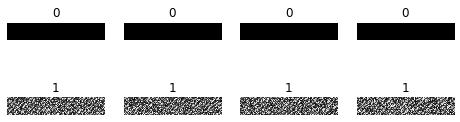

In [9]:
import os
import sys
import glob
import numpy as np
import librosa
from skimage import io
#from sklearn import datasets
from sklearn import utils
import cv2

#COLOR_BYTE = 3
COLOR_BYTE = 1
CATEGORY_NUM = 6
threshhold = 80



#ラベル名(0～)を付けたディレクトリに分類されたイメージファイルを読み込む
#入力パスはラベル名の上位のディレクトリ
def load_wavimage_bin(path): 
#     # ファイル一覧を取得
#     files = glob.glob(os.path.join(path, '*/*.wav'))
#     # イメージとラベル領域を確保
#     images = np.ndarray((len(files), 128, 701)
#                            , dtype = np.uint8)
#     labels = np.ndarray(len(files), dtype=np.int) 
#     # イメージとラベルを読み込み
#     for idx, file in enumerate(files):
#         # イメージ読み込み
#         y,sr = librosa.load(path,sr=16000,offset=0.0,duration=7.0)
#         image = librosa.feature.melspectrogram(y=y,
#                                                 sr=sr,
#                                                 n_mels=128,
#                                                 n_fft=512,
#                                                 win_length=480,
#                                                 hop_length=160,)
#        # ディレクトリ名よりラベルを取得
#         label = os.path.split(os.path.dirname(file))[-1]
#         labels[idx] = int(label)
#      # scikit-learn の他のデータセットの形式に合わせる
#     flat_data = images.reshape((-1, 128 * 701 * COLOR_BYTE))
#     images = flat_data.view()
#     #return datasets.base.Bunch(data=images,
#     return utils.Bunch(data=images,
#                  target=labels.astype(np.int),
#                  target_names=np.arange(CATEGORY_NUM),
#                  images=images,
#                  DESCR=None)
    files = glob.glob(os.path.join(path, '*/*.wav'))
    images = np.ndarray((len(files), 128, 701), dtype = np.uint8)
    labels = np.ndarray(len(files), dtype=np.int)
    for idx, file in enumerate(files):
        y,sr = librosa.load(file,sr=16000,offset=0.0,duration=7.0)

        image = librosa.feature.melspectrogram(y=y,
                                            sr=sr,
                                            n_mels=128,
                                            n_fft=512,
                                            win_length=480,
                                            hop_length=160,)
        

        # ディレクトリ名よりラベルを取得
        label = os.path.split(os.path.dirname(file))[-1]
        labels[idx] = int(label)
        
    flat_data = images.reshape((-1, 128 * 701 * COLOR_BYTE))
    images = flat_data.view()
    return utils.Bunch(data=images,
                 target=labels.astype(np.int),
                 target_names=np.arange(CATEGORY_NUM),
                 images=images,
                 DESCR=None)
if __name__ == '__main__':
    import matplotlib.pyplot as plt

    d = load_wavimage_bin('./dataset/')
    plt.figure(figsize=(8, 8))
    # 画像を 2 行 3 列に表示
    k = 0
    for i in range(6):
        for j in range(4):
            img = d.images[d.target==i][j]
            k += 1
            plt.subplot(6,4, k)
            plt.axis('off')
            plt.imshow(img.reshape(128,701), cmap="gray", interpolation='nearest')
            plt.title(i)
    plt.tight_layout()
    plt.show()

In [ ]:
import os
import sys
import glob
import numpy as np
import librosa
from skimage import io
#from sklearn import datasets
from sklearn import utils
import cv2

#COLOR_BYTE = 3
COLOR_BYTE = 1
CATEGORY_NUM = 6
threshhold = 80

In [ ]:
path = './dataset/'

In [ ]:
wav = './dataset/fujitou_normal/fujitou_normal_001.wav'

In [ ]:
files = glob.glob(os.path.join(path, '*/*.wav'))

In [ ]:
files

In [ ]:
images = np.ndarray((len(files), 128, 701), dtype = np.uint8)

In [ ]:
labels = np.ndarray(len(files), dtype=np.int) 

In [ ]:
labels

In [ ]:
for idx, file in enumerate(files):
    y,sr = librosa.load(file,sr=16000,offset=0.0,duration=7.0)

    image = librosa.feature.melspectrogram(y=y,
                                        sr=sr,
                                        n_mels=128,
                                        n_fft=512,
                                        win_length=480,
                                        hop_length=160,)

    # ディレクトリ名よりラベルを取得
    label = os.path.split(os.path.dirname(file))[-1]
    labels[idx] = int(label)

In [ ]:
flat_data = images.reshape((-1, 128 * 701 * COLOR_BYTE))
images = flat_data.view()

In [ ]:
images

In [ ]:
y,sr = librosa.load(wav,sr=16000,offset=0.0,duration=7.0)

image = librosa.feature.melspectrogram(y=y,
                                        sr=sr,
                                        n_mels=128,
                                        n_fft=512,
                                        win_length=480,
                                        hop_length=160,)

# ディレクトリ名よりラベルを取得
label = os.path.split(os.path.dirname(file))[-1]
labels[idx] = int(label)

In [ ]:
# n_mels is number of Mel bands to generate
n_mels=128
# hop_length is number of samples between successive frames.
hop_length=2068
# n_fft is length of the FFT window
n_fft=2048
# Passing through arguments to the Mel filters
S = librosa.feature.melspectrogram(y=y, sr=sr, n_mels=n_mels, hop_length=hop_length, n_fft=n_fft)

log_S = librosa.power_to_db(log_S, np.max)
print(np.max)


plt.figure(figsize=(12, 4))
librosa.display.specshow(data=S, sr=sr, hop_length=hop_length, x_axis='time', y_axis='mel')
#librosa.display.specshow(data=log_S, sr=sr, hop_length=hop_length, x_axis='time', y_axis='mel')
plt.title('Mel spectrogram')
plt.tight_layout()

In [ ]:
# Load
y, sr = librosa.load(audio_path,sr=16000)


In [ ]:
import librosa
import glob
import numpy as np

In [ ]:
def extract_mel(wav, sr, n_mels=64): #Output -> (timeframe, mel_dim)
    audio, _ = librosa.load(wav, sr=sr)
    mel = librosa.feature.melspectrogram(y=audio, sr=sr, n_mels=n_mels).T
    return mel

In [ ]:
def data_list(path, sr, n_mels=64):
    wav_list = glob.glob(os.path.join(path, '*/*/*'))
    size = len(wav_list)
    data = np.ones((1, n_mels))
    count= 0
    for wavname in wav_list:
        component = extract_mel(wavname, sr=sr, n_mels=64)
        data = np.concatenate([data, component], axis=0)
        count += 1
        sys.stdout.write("\r%s" % "現在"+str(np.around((count/len(wav_list))*100 , 2))+"%完了")
        sys.stdout.flush()
    return data[1:], size

In [ ]:
from pydub import AudioSegment
